In [1]:
import processBlenderSequence 
import importlib
importlib.reload(processBlenderSequence)

from processBlenderSequence import process_blender_sequence
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.transform import Rotation 

# Translation Scene

In [2]:
absolute_folder_path = os.path.join(os.getcwd(), '3D scenes')
print(absolute_folder_path)
csv_name = 'Comp558 simple scene translation_Camera_loc_and_rot.csv'
# csv_name = 'Comp558 simple scene_Camera_loc_and_rot.csv'

file_path= os.path.join(absolute_folder_path,csv_name)

raw_data = pd.read_csv(file_path)

c:\Users\Home\Documents\GitHub\Comp558Project\8PointAlgorithm\3D scenes


In [3]:
processed_data = process_blender_sequence(raw_data)

x    0.0
y    0.0
z    0.0
Name: 0, dtype: float64


c:\Users\Home\Documents\GitHub\Comp558Project\8PointAlgorithm\processBlenderSequence.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  adjusted_data = data.sub([0, initial_position[0], initial_position[1], initial_position[2], initial_rotation[0], initial_rotation[1], initial_rotation[2]])


In [4]:
def set_axes_equal(ax):
    """
    Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc.

    Input
      ax: a matplotlib axis, e.g., as output from plt.gca().
    """

    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the plot radius.
    plot_radius = 0.5*max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

Camera motion 

Translation Plot

C:\Users\Home\AppData\Local\Temp\ipykernel_22652\1367979347.py:28: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x, y, z, c=colors[i], marker='o')


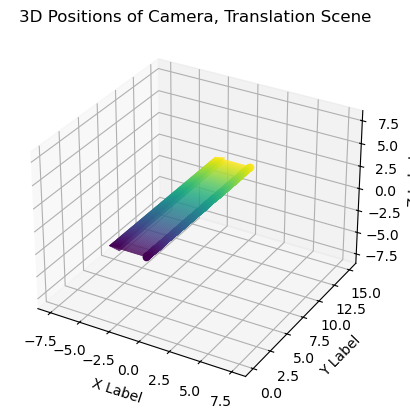

In [5]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
camera_positions = processed_data.loc[:, ["x","y","z"]]
camera_rotations = processed_data.loc[:, ["x_rot","y_rot","z_rot"]]

# max_range = np.array([camera_positions[:, 0].max() - camera_positions[:, 0].min(),
#                     camera_positions[:, 1].max() - camera_positions[:, 1].min(),
#                     camera_positions[:, 2].max() - camera_positions[:, 2].min()]).max()

colors = plt.cm.viridis(np.linspace(0, 1, len(camera_positions)))

for i, row in processed_data.iterrows():
    x = row['x']
    y = row['y']
    z = row['z']

    x_rot = row['x_rot']
    y_rot = row['y_rot']
    z_rot = row['z_rot']

    rot = Rotation.from_euler('xyz', [y_rot, x_rot, z_rot])
    rot_mat = rot.as_matrix()

    forward_vect = np.array([-1,0,0])

    quiver_dir = rot_mat @ forward_vect

    ax.scatter(x, y, z, c=colors[i], marker='o')
    ax.quiver(x, y, z, quiver_dir[0], quiver_dir[1], quiver_dir[2], length=3, linewidths = 0.5, normalize=True, color=colors[i])

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Positions of Camera, Translation Scene')
set_axes_equal(ax)

# Rotation Scene

In [6]:
csv_name = 'Comp558 simple scene_Camera_loc_and_rot.csv'

file_path= os.path.join(absolute_folder_path,csv_name)

raw_data = pd.read_csv(file_path)

In [7]:
processed_data = process_blender_sequence(raw_data, True)

x    0.000000e+00
y   -9.511542e-07
z   -3.099254e-13
Name: 0, dtype: float64


c:\Users\Home\Documents\GitHub\Comp558Project\8PointAlgorithm\processBlenderSequence.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  adjusted_data = data.sub([0, initial_position[0], initial_position[1], initial_position[2], 0,initial_rotation[1],initial_rotation[2]])


C:\Users\Home\AppData\Local\Temp\ipykernel_22652\1463285953.py:28: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x, y, z, c=colors[i], marker='o')


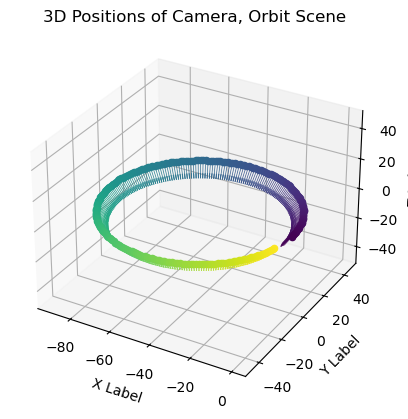

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
camera_positions = processed_data.loc[:, ["x","y","z"]]
camera_rotations = processed_data.loc[:, ["x_rot","y_rot","z_rot"]]

# max_range = np.array([camera_positions[:, 0].max() - camera_positions[:, 0].min(),
#                     camera_positions[:, 1].max() - camera_positions[:, 1].min(),
#                     camera_positions[:, 2].max() - camera_positions[:, 2].min()]).max()

colors = plt.cm.viridis(np.linspace(0, 1, len(camera_positions)))

for i, row in processed_data.iterrows():
    x = row['x']
    y = row['y']
    z = row['z']

    x_rot = row['x_rot']
    y_rot = row['y_rot']
    z_rot = row['z_rot']

    rot = Rotation.from_euler('xyz', [y_rot, x_rot, z_rot])
    rot_mat = rot.as_matrix()

    forward_vect = np.array([-1,0,0])

    quiver_dir = rot_mat @ forward_vect

    ax.scatter(x, y, z, c=colors[i], marker='o')
    ax.quiver(x, y, z, quiver_dir[0], quiver_dir[1], -quiver_dir[2], length=10, linewidths = 0.5, normalize=True, color=colors[i])

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Positions of Camera, Orbit Scene')
set_axes_equal(ax)